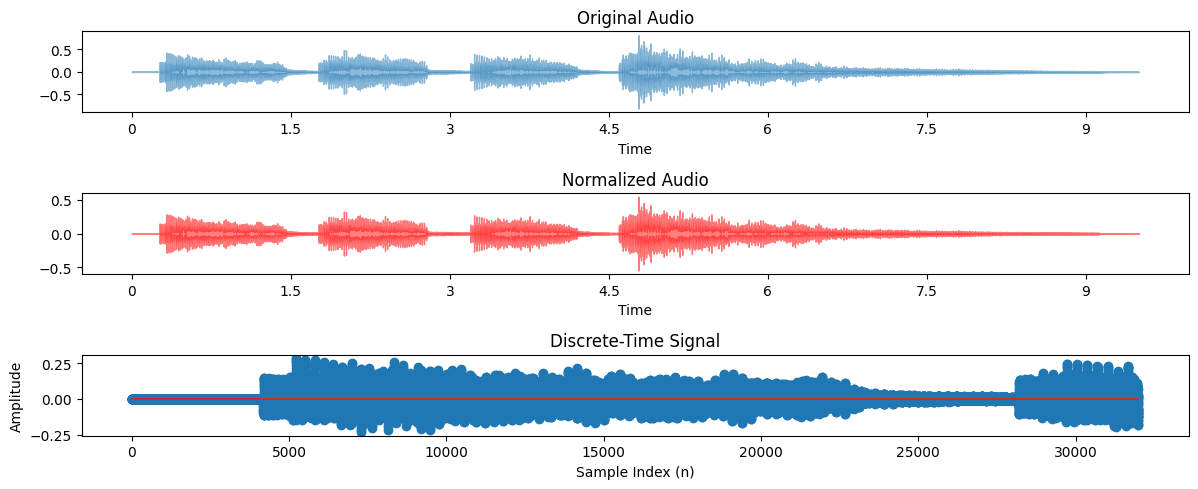

In [6]:
import librosa
import librosa.display
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

def normalize_audio(audio, target_level=-26):
    rms = np.sqrt(np.mean(audio**2))  # محاسبه RMS سیگنال
    scalar = 10**(target_level / 20) / (rms + 1e-6)  # محاسبه فاکتور نرمال‌سازی
    return audio * scalar

def pad_or_trim_audio(audio, target_length, sr):
    target_samples = int(target_length * sr)  # محاسبه تعداد نمونه‌های مورد نیاز
    return librosa.util.fix_length(data=audio, size=target_samples)  # استفاده از librosa برای تنظیم طول

def discretize_signal(audio, sr):
    n = np.arange(len(audio))  # تولید اندیس‌های زمان-گسسته
    return n, audio

# بارگذاری فایل صوتی
file_path = "example.wav"
audio, sr = librosa.load(file_path, sr=16000)

# نرمال‌سازی سیگنال
normalized_audio = normalize_audio(audio)

# تنظیم طول سیگنال (مثلاً 2 ثانیه)
target_length = 2  # مدت زمان بر حسب ثانیه
adjusted_audio = pad_or_trim_audio(normalized_audio, target_length, sr)

# تبدیل به سیگنال زمان-گسسته
n, discrete_audio = discretize_signal(adjusted_audio, sr)

# ذخیره فایل نهایی
sf.write("processed_example.wav", adjusted_audio, sr)

# نمایش سیگنال قبل و بعد از تنظیم طول و تبدیل به زمان-گسسته
plt.figure(figsize=(12, 5))
plt.subplot(3, 1, 1)
librosa.display.waveshow(audio, sr=sr, alpha=0.5)
plt.title("Original Audio")
plt.subplot(3, 1, 2)
librosa.display.waveshow(normalized_audio, sr=sr, alpha=0.5, color='r')
plt.title("Normalized Audio")
plt.subplot(3, 1, 3)
stem_plot = plt.stem(n, discrete_audio)
stem_plot[0].set_linewidth(0.5)  # تنظیم ضخامت خط‌ها برای نمایش بهتر
plt.title("Discrete-Time Signal")
plt.xlabel("Sample Index (n)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()



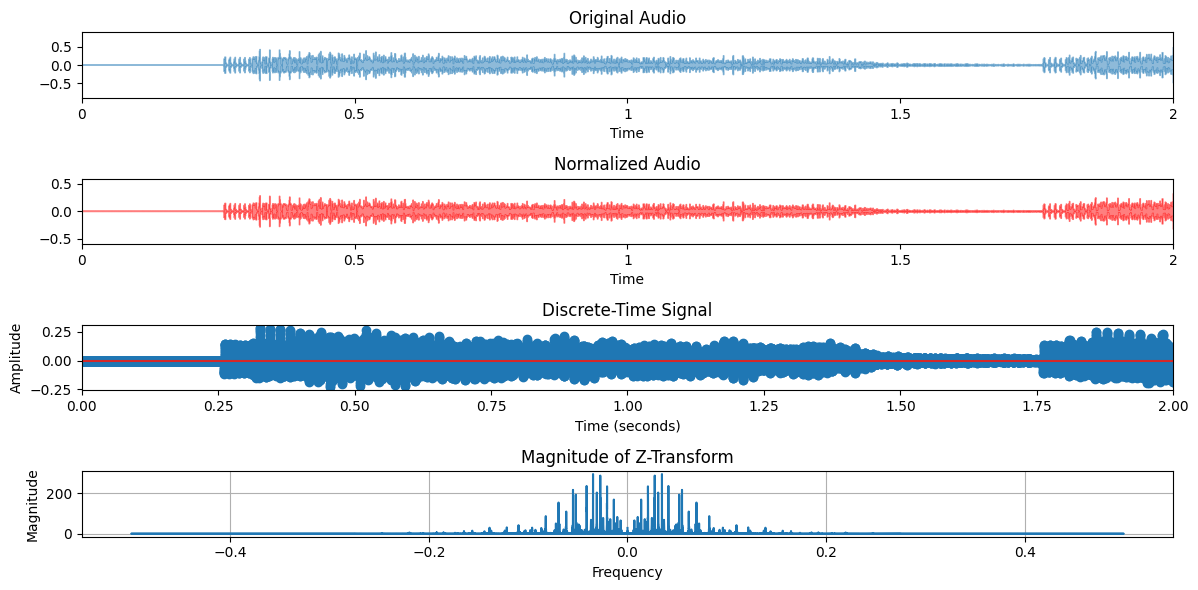

In [9]:
import librosa
import librosa.display
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.signal import freqz, dlti, dimpulse

def normalize_audio(audio, target_level=-26):
    rms = np.sqrt(np.mean(audio**2))  # محاسبه RMS سیگنال
    scalar = 10**(target_level / 20) / (rms + 1e-6)  # محاسبه فاکتور نرمال‌سازی
    return audio * scalar

def pad_or_trim_audio(audio, target_length, sr):
    target_samples = int(target_length * sr)  # محاسبه تعداد نمونه‌های مورد نیاز
    return librosa.util.fix_length(data=audio, size=target_samples)  # استفاده از librosa برای تنظیم طول

def discretize_signal(audio, sr):
    n = np.arange(len(audio))  # تولید اندیس‌های زمان-گسسته
    t = n / sr  # تبدیل ایندکس به زمان
    return n, t, audio

def compute_z_transform(audio):
    z = np.fft.fft(audio)  # محاسبه تبدیل Z با تبدیل فوریه گسسته (DFT)
    freqs = np.fft.fftfreq(len(audio))
    return z, freqs

# بارگذاری فایل صوتی
file_path = "example.wav"
audio, sr = librosa.load(file_path, sr=16000)

# نرمال‌سازی سیگنال
normalized_audio = normalize_audio(audio)

# تنظیم طول سیگنال (2 ثانیه)
target_length = 2  # مدت زمان بر حسب ثانیه
adjusted_audio = pad_or_trim_audio(normalized_audio, target_length, sr)

# تبدیل به سیگنال زمان-گسسته
n, t, discrete_audio = discretize_signal(adjusted_audio, sr)

# ذخیره فایل پردازش‌شده برای تبدیل Z
np.save("processed_example.npy", discrete_audio)

# محاسبه تبدیل Z
z_transform, frequencies = compute_z_transform(discrete_audio)

# ذخیره فایل نهایی
sf.write("processed_example.wav", adjusted_audio, sr)

# نمایش سیگنال قبل و بعد از تنظیم طول و تبدیل به زمان-گسسته
plt.figure(figsize=(12, 6))
plt.subplot(4, 1, 1)
librosa.display.waveshow(audio, sr=sr, alpha=0.5)
plt.title("Original Audio")
plt.xlim([0, target_length])
plt.subplot(4, 1, 2)
librosa.display.waveshow(normalized_audio, sr=sr, alpha=0.5, color='r')
plt.title("Normalized Audio")
plt.xlim([0, target_length])
plt.subplot(4, 1, 3)
stem_plot = plt.stem(t, discrete_audio)
stem_plot[0].set_linewidth(0.5)  # تنظیم ضخامت خط‌ها برای نمایش بهتر
plt.title("Discrete-Time Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.xlim([0, target_length])
plt.subplot(4, 1, 4)
plt.plot(frequencies, np.abs(z_transform))
plt.title("Magnitude of Z-Transform")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.grid()
plt.tight_layout()
plt.show()


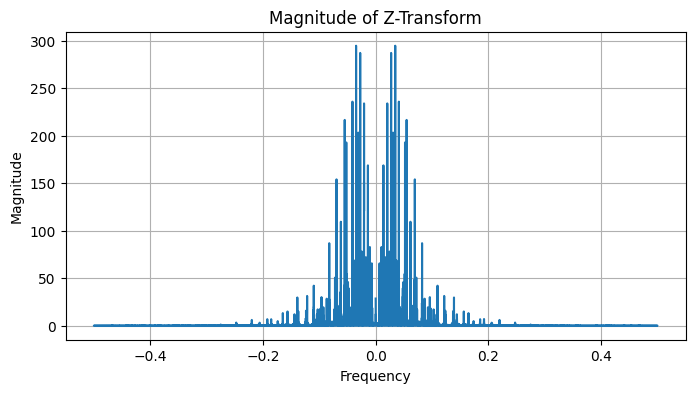

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

def compute_z_transform(audio):
    z = np.fft.fft(audio)  # محاسبه تبدیل Z با تبدیل فوریه گسسته (DFT)
    freqs = np.fft.fftfreq(len(audio))
    return z, freqs

# بارگذاری سیگنال زمان-گسسته از فایل پردازش‌شده
processed_audio = np.load("processed_example.npy")  # فرض بر این است که سیگنال قبلاً ذخیره شده است

# محاسبه تبدیل Z
z_transform, frequencies = compute_z_transform(processed_audio)

# نمایش مقدار مطلق تبدیل Z
plt.figure(figsize=(8, 4))
plt.plot(frequencies, np.abs(z_transform))
plt.title("Magnitude of Z-Transform")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.grid()
plt.show()
